In [20]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["axes.grid"] = True

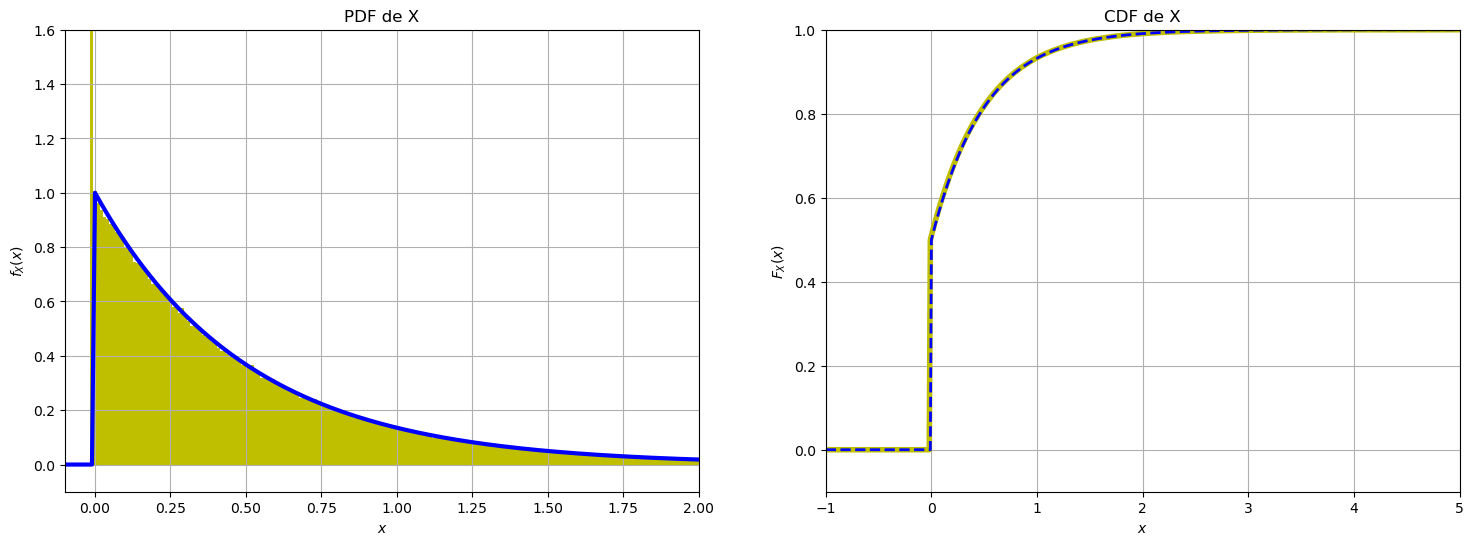

In [31]:
"""
clear all; close all; clc;
pkg load statistics;

N = 10^6;                        % Número de lançamentos

U = randi([1 6], 1, N);          % Lançamento dos dados

idx1 = U == 1 | U == 3 | U == 5; % Ocorrências ímpares
idx2 = U == 2 | U == 4 | U == 6; % Ocorrências pares

X = zeros(1, N); % Criando vetor para armazenar valores aleatórios de X

X(idx1) = 0; % Se for impar atribuir valor 0

% Se for par atribuir valor pela distribuição exponencial com \lambda = 2
lambda = 2; beta = 1/lambda; % Parâmetros da distribuição exponencial
X(idx2) = exprnd(beta, 1, sum(idx2));

dx = 0.01; x = -1 : dx : 5.2; % Vetor de valores de x para plotar pdf e cdf

pdfX_sim = hist(X, x) / (N * dx); % Simulação da pdf de X
pdfX_teo = (1/2) * (x == 0) + exp(-lambda*x) .* (x >= 0); % PDF teórica de X

cdfX_sim = cumsum(pdfX_sim) * dx; % Simulação da CDF de X
cdfX_teo = (1 - 1/2 * exp(-lambda*x)) .* (x >= 0); % CDF teórica de X


figure;
subplot(2,1,1); hold on; grid on;
bar(x, pdfX_sim,'y'); % Plotando PDF simulada
plot(x, pdfX_teo,'b', 'LineWidth', 3'); % Plotando PDF teórica
plot([0, 0], [0, 1/2], 'b', 'LineWidth', 4'); % Plotando linha do impulso
plot([0], [1/2], 'b^', 'LineWidth', 3'); % Plotando seta do impulso
xlim([-0.1 5]); ylim([-0.1 1.6]); % Limites dos eixos
xlabel('x'); ylabel('f_X(x)'); % Legendas dos eixos

subplot(2,1,2); hold on; grid on;
plot(x, cdfX_sim, 'y', 'LineWidth', 4); % Plotando CDF simulada
plot(x, cdfX_teo, 'b--', 'LineWidth', 2); % Plotando CDF teórica
xlim([-1 5]); ylim([-0.1 1]); % Limites dos eixos
xlabel('x'); ylabel('F_X(x)'); % Legendas dos eixos

printf('Sim: Pr[-2 <= X <= 2] = %g\n', sum(X <= 2) / N); % Probabilidade simulada
printf('Teo: Pr[-2 <= X <= 2] = %g\n', 1 - exp(-2 * lambda)); % Probabilidade teórica

printf('Sim: E[X] = %g\n', mean(X)); % Valor esperado simulado
printf('Teo: E[X] = %g\n', 1/4); % Valor esperado teórico

% Gerando esboços para o relatório
figure; hold on; grid on;
plot(x, pdfX_teo,'b', 'LineWidth', 3'); % Plotando PDF teórica
plot([0, 0], [0, 1/2], 'b', 'LineWidth', 4'); % Plotando linha do impulso
plot([0], [1/2], 'b^', 'LineWidth', 3'); % Plotando seta do impulso
xlim([-0.1 5]); ylim([-0.1 1.6]); % Limites dos eixos
xlabel('x'); ylabel('f_X(x)'); % Legendas dos eixos

figure; hold on; grid on;
plot(x, cdfX_teo, 'b--', 'LineWidth', 2); % Plotando CDF teórica
xlim([-1 5]); ylim([-0.1 1]); % Limites dos eixos
xlabel('x'); ylabel('F_X(x)'); % Legendas dos eixos"""

N = 10**6

U = np.random.randint(1, 7, N)

idx1 = (U == 1) | (U == 3) | (U == 5)
idx2 = (U == 2) | (U == 4) | (U == 6)

X = np.zeros(N)

X[idx1] = 0
X[idx2] = np.random.exponential(1 / 2, np.sum(idx2))

dx = 0.01
x = np.arange(-1, 5.2, dx)

pdfX_sim = np.histogram(X, x)[0] / (N * dx)
pdfX_teo = (1 / 2) * (x == 0) + np.exp(-2 * x) * (x >= 0)

cdfX_sim = np.cumsum(pdfX_sim) * dx
cdfX_teo = (1 - 1 / 2 * np.exp(-2 * x)) * (x >= 0)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

axs[0].bar(x[:-1], pdfX_sim, width=dx, color="y")
axs[0].plot(x, pdfX_teo, "b", linewidth=3)
axs[0].set_xlim(-0.1, 2)
axs[0].set_ylim(-0.1, 1.6)
axs[0].set_title("PDF de X")
axs[0].set_xlabel("$x$")
axs[0].set_ylabel("$f_X(x)$")

axs[1].plot(x[:-1], cdfX_sim, "y", linewidth=4)
axs[1].plot(x, cdfX_teo, "b--", linewidth=2)
axs[1].set_xlim(-1, 5)
axs[1].set_ylim(-0.1, 1)
axs[1].set_title("CDF de X")
axs[1].set_xlabel("$x$")
axs[1].set_ylabel("$F_X(x)$")

plt.show()